## Act 7 

In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set() 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
from sklearn import linear_model
import statsmodels.formula.api as smf

In [5]:
%ls datasets

adult.csv                  census.csv     nhanes_2015_2016.csv
airline_data.csv           cwurData.csv   pokemon.csv
antropometria00.csv        data.csv       sample_pivot.csv
antropometria-dataset.csv  headbrain.csv  tips.csv
Canada.xlsx                mic.xlsx       weight-height.csv
Cartwheeldata.csv          movies.csv


In [6]:
df = pd.read_csv('datasets/antropometria-dataset.csv')
df.head()

,folio,intp,entidad,desc_ent,sexo,edad,meses,peso,ropa,talla,...,hpresion,tbrazo,htension,PrimaryLast,code_upm,est_dis,est_urb,est_marg,pondef,est_var
0,210295,2,21,PUEBLA,2,38,8,73.70,2,146.4,...,16:30,2,16:35,1,R2101,5,3,1,3470.002176,215
1,101655,3,10,DURANGO,2,11,11,35.65,2,145.1,...,15:25,3,15:25,1,M1041,1,1,1,417.946672,101
2,10287,6,1,AGUASCALIENTES,2,18,8,54.80,1,162.0,...,9:40,1,9:40,1,M0108,5,3,1,472.980811,15
3,91526,4,9,DISTRITO FEDERAL,1,10,8,33.40,2,146.5,...,7:40,3,7:45,1,M0931,4,3,2,1832.581391,94
4,210939,3,21,PUEBLA,2,19,3,97.95,2,161.0,...,6:00,2,6:00,1,M2123,5,3,1,7622.066564,215


## Pregunta 1 

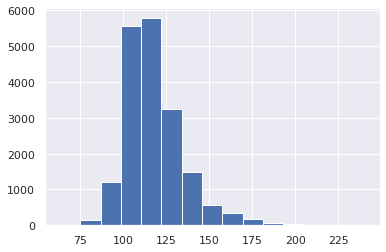

In [7]:
data = [df.loc[:,'sistol'],]

patches=plt.hist(data, bins = 15)
# pregunta 1 


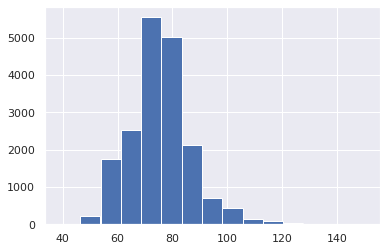

In [9]:
data = [df.loc[:,'diastol'],]

patches=plt.hist(data, bins = 15)


## Pregunta 2

<function matplotlib.pyplot.show(*args, **kw)>

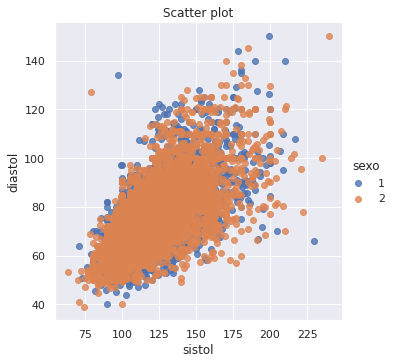

In [13]:
sns.lmplot(x = 'sistol',
           y = 'diastol',
           data = df,
           fit_reg = False,
           hue = 'sexo',
          )
      
plt.title('Scatter plot')
plt.show

# pregunta 2

In [50]:
x = pd.pivot_table(df,
            index = ['folio'],
            columns = ['sexo'],
            values = ['sistol'],
              )

# mujeres = 2 
x

sistol       
sexo        1      2
folio               
10001   125.0    NaN
10011   111.5    NaN
10015   111.0    NaN
10021     NaN  100.0
10034     NaN  104.5
...       ...    ...
321843    NaN  107.0
321844    NaN  118.0
321849  110.0    NaN
321857    NaN  120.0
321861    NaN  104.0

[18585 rows x 2 columns]

In [51]:
x.columns

MultiIndex([('sistol', 1),
            ('sistol', 2)],
           names=[None, 'sexo'])

In [63]:
x = x[('sistol', 2)]

KeyError: ('sistol', 2)

In [58]:
y = pd.pivot_table(df,
            index = ['folio'],
            columns = ['sexo'],
            values = ['diastol'],
              )

# mujeres = 2 
y

diastol      
sexo         1     2
folio               
10001     78.0   NaN
10011     75.0   NaN
10015     80.0   NaN
10021      NaN  60.0
10034      NaN  64.5
...        ...   ...
321843     NaN  65.0
321844     NaN  60.0
321849    70.0   NaN
321857     NaN  50.0
321861     NaN  63.0

[18585 rows x 2 columns]

In [59]:
y.columns

MultiIndex([('diastol', 1),
            ('diastol', 2)],
           names=[None, 'sexo'])

In [60]:
y = y[('diastol', 2)]

## Pregunta 4 

In [77]:
sns.lmplot(x = x[('sistol', 2)], 
           y = y[('diastol', 2)], 
           data = df, 
           fit_reg = False)
      
plt.title('Scatter plot')
plt.show

KeyError: ('sistol', 2)

## Pregunta 5

In [ ]:
## pregunta 5 

a = pd.pivot_table(df,
            index = ['folio'],
            columns = ['sexo'],
            values = ['peso'],
              )
a
# mujer = 2

peso      
sexo        1     2
folio              
10001   64.00   NaN
10011   46.55   NaN
10015   87.40   NaN
10021     NaN  51.7
10034     NaN  52.8
...       ...   ...
321843    NaN  68.9
321844    NaN  60.6
321849  93.95   NaN
321857    NaN  89.2
321861    NaN  60.5

[18585 rows x 2 columns]

In [79]:
a.columns

MultiIndex([('peso', 1),
            ('peso', 2)],
           names=[None, 'sexo'])

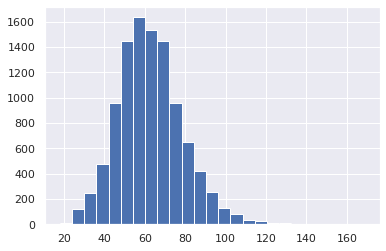

In [98]:
data = a[('peso', 2)]

patches=plt.hist(data, bins = 25)

## pregunta 5

## Pregunta 3 

In [86]:
z = pd.pivot_table(df,
            index = ['folio'],
            columns = ['sexo'],
            values = ['cintura'],
              )
z
# hombres = 1

cintura       
sexo         1      2
folio                
10001     82.1    NaN
10011     78.4    NaN
10015    111.0    NaN
10021      NaN   73.1
10034      NaN   71.9
...        ...    ...
321838    69.8    NaN
321844     NaN   83.6
321849   105.0    NaN
321857     NaN  111.8
321861     NaN   84.3

[17979 rows x 2 columns]

In [87]:
z.columns

MultiIndex([('cintura', 1),
            ('cintura', 2)],
           names=[None, 'sexo'])

In [99]:
x = pd.pivot_table(df,
            index = ['folio'],
            columns = ['sexo'],
            values = ['cintura'],
              )
x.head()

cintura      
sexo        1     2
folio              
10001    82.1   NaN
10011    78.4   NaN
10015   111.0   NaN
10021     NaN  73.1
10034     NaN  71.9

In [100]:
x.columns

MultiIndex([('cintura', 1),
            ('cintura', 2)],
           names=[None, 'sexo'])

In [101]:
sns.boxplot(data = x[('cintura', 2)])

KeyError: 0